## Linear regression with one variable

In [56]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [57]:
# Read comma separated data
data = np.loadtxt('ex1data1.txt' , delimiter=',')
X, y = data[:, 0], data[:, 1]

m = y.size  # number of training examples

In [58]:
def plotData(x, y):
   
    fig = plt.figure(figsize=(15,8))  
    
    plt.plot(x, y, 'ro', ms=10, mec='k')
    plt.ylabel('Profit in $10,000')
    plt.xlabel('Population of City in 10,000s')



In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### By using Regularization

 Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
The first axis (axis=0) refers to rows (training examples) 
and second axis (axis=1) refers to columns (features). Computing the cost of a particular choice of theta. 
we should set J to the cost.

In [60]:
m = y_train.size
X_train = np.stack([np.ones(m), X_train], axis=1)


In [61]:
def computeCost(X, y, theta):
    m = y.shape[0]
    J = 0
    J = (np.sum(np.square(np.dot(X,theta)-y)))/(2*m)
    return J

In [62]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn `theta`. Updates theta by taking `num_iters`
    gradient steps with learning rate `alpha`.
    
    Parameters
    ----------
    X : array_like
        The input dataset of shape (m x n+1).
    
    y : array_like
        Value at given features. A vector of shape (m, ).
    
    theta : array_like
        Initial values for the linear regression parameters. 
        A vector of shape (n+1, ).
    
    alpha : float
        The learning rate.
    
    num_iters : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta : array_like
        The learned linear regression parameters. A vector of shape (n+1, ).
    
    J_history : list
        A python list for the values of the cost function after each iteration.
    
    Instructions
    ------------
    Peform a single gradient step on the parameter vector theta.

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) and gradient here.
    """
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = [] 
    
    for i in range(num_iters):
       
        theta = theta - (alpha/m)*(np.dot(X.transpose(),(np.dot(X,theta)-y)))

        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

In [63]:
# initialize fitting parameters
theta = np.zeros(2)

# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, J_history = gradientDescent(X_train ,y_train, theta, alpha, iterations)

In [64]:
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))


Theta found by gradient descent: -3.3451, 1.1196


In [65]:
m = y_test.size
X_test = np.stack([np.ones(m), X_test], axis=1)


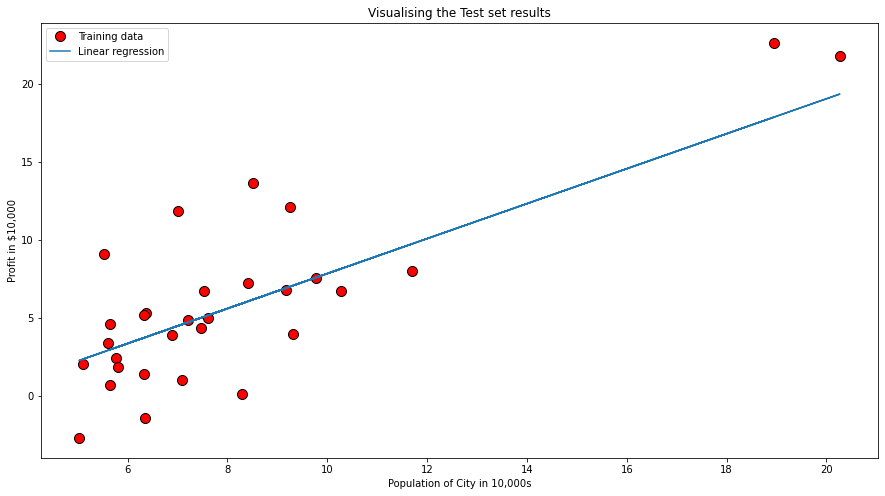

In [66]:
# plot the linear fit
plotData(X_test[:, 1], y_test)
plt.plot(X_test[:, 1], np.dot(X_test, theta), '-')
plt.title('Visualising the Test set results')
plt.legend(['Training data', 'Linear regression']);

In [67]:
# Predict values for population sizes of 35,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

For population = 35,000, we predict a profit of 5734.30



### By using sklearn library

In [68]:
# Read comma separated data
data = np.loadtxt('ex1data1.txt' , delimiter=',')
X, y = data[:, 0], data[:, 1]

X=X.reshape(-1, 1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [70]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [71]:
y_pred = lm.predict(X_test)

<Figure size 1080x576 with 0 Axes>

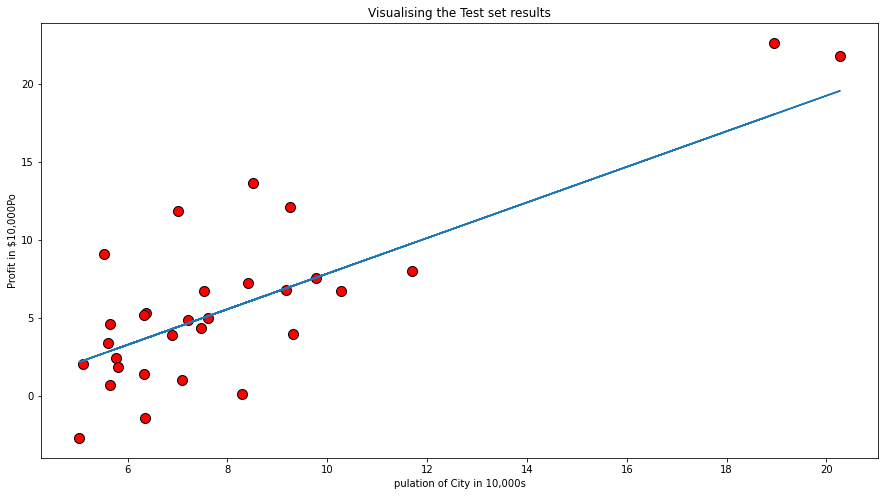

In [72]:
fig = plt.figure(figsize=(15,8))  
plotData(X_test, y_test)
plt.plot(X_test, lm.predict(X_test))
plt.title('Visualising the Test set results')
plt.ylabel('Profit in $10,000Po')
plt.xlabel('pulation of City in 10,000s')
plt.show()

In [73]:
# Predict values for population sizes of 35,000
predict1 = lm.predict(np.array([[3.5]]))
print(f'For population = 35,000, we predict a profit of{predict1*10000}')

For population = 35,000, we predict a profit of[4408.86089535]


In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.49995542427772
MSE: 11.305525431571304
RMSE: 3.362369020730964
